In [4]:
%cd ../
!pip3 install seaborn -q
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from IPython.lib.display import YouTubeVideo
%matplotlib inline

/mlx_devbox/users/janne.spijkervet/repo/44/eurovision-dataset


# Eurovision Song Contest Dataset
### Contestant and Voting Data
This is a notebook accompanying the Eurovision Song Contest Dataset, containing the rankings, country-to-country votes, song metadata, lyrics and video/audio data for all songs that competed in the Eurovision Song Contests.


## Contestants Data

Columns:
```
year (contest year)
from_country_id (country id of contestant)
from_country (country name of contestant)
performer (artist)
song (title of the contestant's song)
sf_num (participated in semi-final 1, 2 or 0 (from 2004-2008 there was only one semi-final)
running_final (order in the broadcast of the contest's final)
running_sf (order in the broadcast of the contest's semi-final)
place_final (place in the final)
points_final (points in the final)
place_sf (place in the semi-final)
points_sf (points in the semi-final)
points_tele_final (televoting points in the contest's final)
points_jury_final (juryvoting points in the contest's final)
points_tele_sf (televoting points in the contest's semi-final)
points_jury_sf (juryvoting points in the contest's semi-final)
lyrics (lyrics of the song)
youtube_url (url to video on YouTube)
```

### Load data

In [6]:
contestants = pd.read_csv('./data/contestants.csv')
contestants = contestants.replace({r'\s+$': '', r'^\s+': ''}, regex=True).replace(r'\\n',  '\n', regex=True)  # replace \\n with \n for newline prints

In [95]:

pprint(contestants.columns.tolist())

['year',
 'to_country_id',
 'to_country',
 'performer',
 'song',
 'place_contest',
 'sf_num',
 'running_final',
 'running_sf',
 'place_final',
 'points_final',
 'place_sf',
 'points_sf',
 'points_tele_final',
 'points_jury_final',
 'points_tele_sf',
 'points_jury_sf',
 'composers',
 'lyricists',
 'lyrics',
 'youtube_url']


In [103]:
contestants["to_country"].unique()

array(['Switzerland', 'Netherlands', 'Belgium', 'Germany', 'France',
       'Luxembourg', 'Italy', 'Denmark', 'United Kingdom', 'Austria',
       'Sweden', 'Monaco', 'Norway', 'Yugoslavia', 'Spain', 'Finland',
       'Portugal', 'Ireland', 'Malta', 'Israel', 'Greece', 'Turkey',
       'Morocco', 'Cyprus', 'Iceland', 'Croatia', 'Bosnia & Herzegovina',
       'Slovenia', 'Poland', 'Hungary', 'Russia', 'Slovakia', 'Romania',
       'Estonia', 'Lithuania', 'North Macedonia', 'Latvia', 'Ukraine',
       'Serbia & Montenegro', 'Albania', 'Andorra', 'Belarus', 'Moldova',
       'Bulgaria', 'Armenia', 'Serbia', 'Georgia', 'Montenegro',
       'Czech Republic', 'Azerbaijan', 'San Marino', 'Australia',
       'North MacedoniaN.Macedonia', 'Czechia'], dtype=object)

In [7]:
print('There are {} contestants in Eurovision Song Contests from {} to {}'.format(len(contestants), contestants['year'].min(), contestants['year'].max()))

There are 1719 contestants in Eurovision Song Contests from 1956 to 2023


### All countries

In [99]:
pprint(contestants['to_country'].unique().tolist())

['Switzerland',
 'Netherlands',
 'Belgium',
 'Germany',
 'France',
 'Luxembourg',
 'Italy',
 'Denmark',
 'United Kingdom',
 'Austria',
 'Sweden',
 'Monaco',
 'Norway',
 'Yugoslavia',
 'Spain',
 'Finland',
 'Portugal',
 'Ireland',
 'Malta',
 'Israel',
 'Greece',
 'Turkey',
 'Morocco',
 'Cyprus',
 'Iceland',
 'Croatia',
 'Bosnia & Herzegovina',
 'Slovenia',
 'Poland',
 'Hungary',
 'Russia',
 'Slovakia',
 'Romania',
 'Estonia',
 'Lithuania',
 'North Macedonia',
 'Latvia',
 'Ukraine',
 'Serbia & Montenegro',
 'Albania',
 'Andorra',
 'Belarus',
 'Moldova',
 'Bulgaria',
 'Armenia',
 'Serbia',
 'Georgia',
 'Montenegro',
 'Czech Republic',
 'Azerbaijan',
 'San Marino',
 'Australia',
 'North MacedoniaN.Macedonia',
 'Czechia']


### Helper functions

In [100]:
def get_contestants(year, country):
    return contestants[(contestants['year'] == year) & (contestants['to_country'] == country)]

## Examples

### Get contestant by year and country
Show song title, lyric and YouTube video

I Can't Go On
Performed by: Robin Bengtsson
-------
I can't go on
I can't go on 
Gotta keep it together 

Don't get me wrong 
Don't get me wrong 
Cause baby you make me better

Hey 

With just one look you make me shiver 
I just wanna take you home 
Wanna go OH 
Yeah I wanna go OOH 

Now girl you make me a believer  
I wanna take off all my clothes   
wanna go OH 
You make me wanna go OH

I just can't go on no more 
When you look this freakin' beautiful

ooh 

Hands down to the floor my love 
And I'm doing  
Whatever you want

I can't go on I can't go on  
When you look this freakin' beautiful  
I can't go on I can't go on  
When you look this freakin' beautiful

You've got me good 
You've got me good 
And I'm not going nowhere

Right in your hook 
That's understood 
But Im take you to somewhere

I just can't go on no more 
When you look this freakin' beautiful

Hands down to the floor my love 
And I'm doing  
Whatever you want

I can't go on I can't go on  
When you look this freakin'

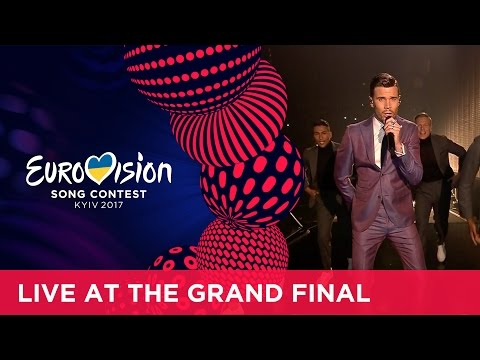

In [101]:
year = 2017
country = 'Sweden'

contestant = get_contestants(year, country)
# print('There were {} contestant(s) this year'.format(len(contestant)))

song_title = contestant['song'].values[0]
performer = contestant['performer'].values[0]
lyric = contestant['lyrics'].values[0]
youtube = contestant['youtube_url'].values[0]

print(song_title)
print('Performed by: {}'.format(performer))
print('-------')
print(lyric)
print(youtube)
YouTubeVideo(youtube.split('=')[-1])

### Composers and Lyricists

In [21]:
contestants[['year', 'composers', 'lyricists']]

,year,composers,lyricists
0,1956,Georg Benz Stahl,NaN
1,1956,Cor Lemaire,Annie M. G. Schmidt
2,1956,Jacques Say;Jean Miret,Robert Montal
3,1956,Walter Andreas Schwarz,NaN
4,1956,André Lodge,Rachèle Thoreau
...,...,...,...
1714,2023,Andrea Lazzeretti;Tommaso Oliveri;Francesco Bi...,NaN
1715,2023,Pele Loriano;Ronald Janeček;Selina-Maria Edbau...,NaN
1716,2023,Enis Mulla,Eriona Rushiti
1717,2023,Krists Indrišonoks;Monika Linkytė,NaN


In [36]:
composers = []
for i, row in contestants.iterrows():
    y = row['year']
    if row["composers"] is not np.nan:
        cs = row['composers'].split(';')
        for c in cs:
            composers.append([y, c])
composers = pd.DataFrame(composers, columns=['year', 'composer'])

In [37]:
lyricists = []
for i, row in contestants.iterrows():
    y = row['year']
    if row["lyricists"] is not np.nan:
        cs = row['lyricists'].split(';')
        for c in cs:
            lyricists.append([y, c])
lyricists = pd.DataFrame(lyricists, columns=['year', 'lyricist'])

In [38]:
composers

,year,composer
0,1956,Georg Benz Stahl
1,1956,Cor Lemaire
2,1956,Jacques Say
3,1956,Jean Miret
4,1956,Walter Andreas Schwarz
...,...,...
2658,2023,Alex Canion
2659,2023,Ashley Doodkorte
2660,2023,Daniel Estrin
2661,2023,Scott Kay


In [39]:
lyricists

,year,lyricist
0,1956,Annie M. G. Schmidt
1,1956,Robert Montal
2,1956,Rachèle Thoreau
3,1956,Pinchi
4,1956,David Bee
...,...,...
1308,2023,Maria Broberg
1309,2023,Bojan Cvjetićanin
1310,2023,Beni Kadagidze
1311,2023,Iru Khechanovi


/tmp/ipykernel_427000/173527137.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  composers["composer"].str.replace('\$\$','').value_counts().plot(kind="bar")


<Axes: >

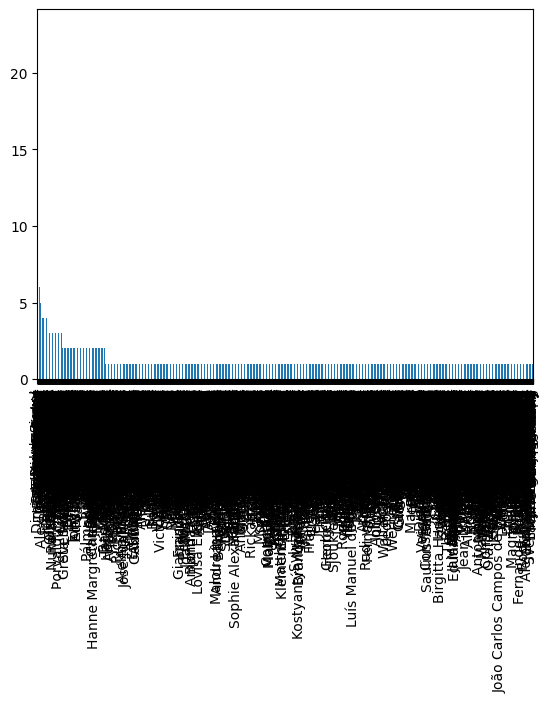

In [48]:
composers["composer"].str.replace('\$\$','').value_counts().plot(kind="bar")

### Plots

<Axes: xlabel='year', ylabel='place_final'>

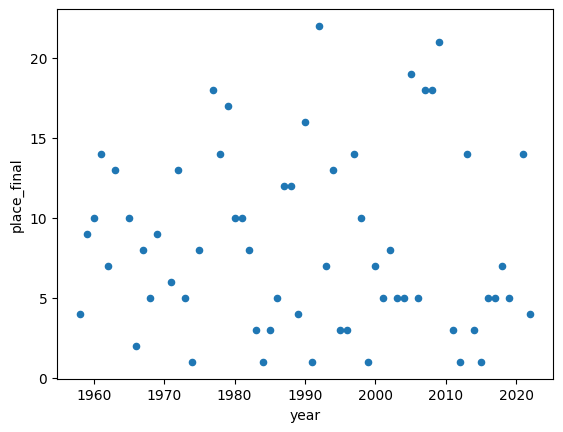

In [54]:
country = 'Sweden'
contestants[contestants['to_country'] == country].plot('year', 'place_final', kind='scatter')
# contestants[contestants['to_country'] == country].plot('year', 'running_final', kind='scatter')

# Voting Data

In [57]:
votes = pd.read_csv('data/votes.csv')

In [62]:
print(votes.shape)
print(votes.columns)

(50366, 9)
Index(['year', 'round', 'from_country_id', 'to_country_id', 'from_country',
       'to_country', 'total_points', 'tele_points', 'jury_points'],
      dtype='object')


In [79]:
def vote_grid(year):
    return votes[votes['year'] == year].pivot_table('total_points', 'from_country', 'to_country', aggfunc=np.sum, fill_value=0)

def get_received_votes(year, to_country):
    return votes[(votes['year'] == year) & (votes['to_country'] == to_country)]

def get_votes_from_to(year, from_country, to_country):
    return votes[(votes['year'] == year) & (votes['from_country'] == from_country) & (votes['to_country'] == to_country)]

def get_all_points(year, from_country, to_country):
    return get_votes_from_to(year, from_country, to_country)['total_points'].sum()

### Examples

In [80]:
from_country = 'gb'
to_country = 'nl'

v = get_votes_from_to(2019, from_country, to_country)
print(v)

v = get_all_points(2019, from_country, to_country)
print(v)

       year         round from_country_id to_country_id from_country  \
46263  2019         final              gb            nl           gb   
46989  2019  semi-final-2              gb            nl           gb   

      to_country  total_points  tele_points  jury_points  
46263         nl            10          4.0          6.0  
46989         nl             7          5.0          2.0  
17


### Voting grid / heatmap

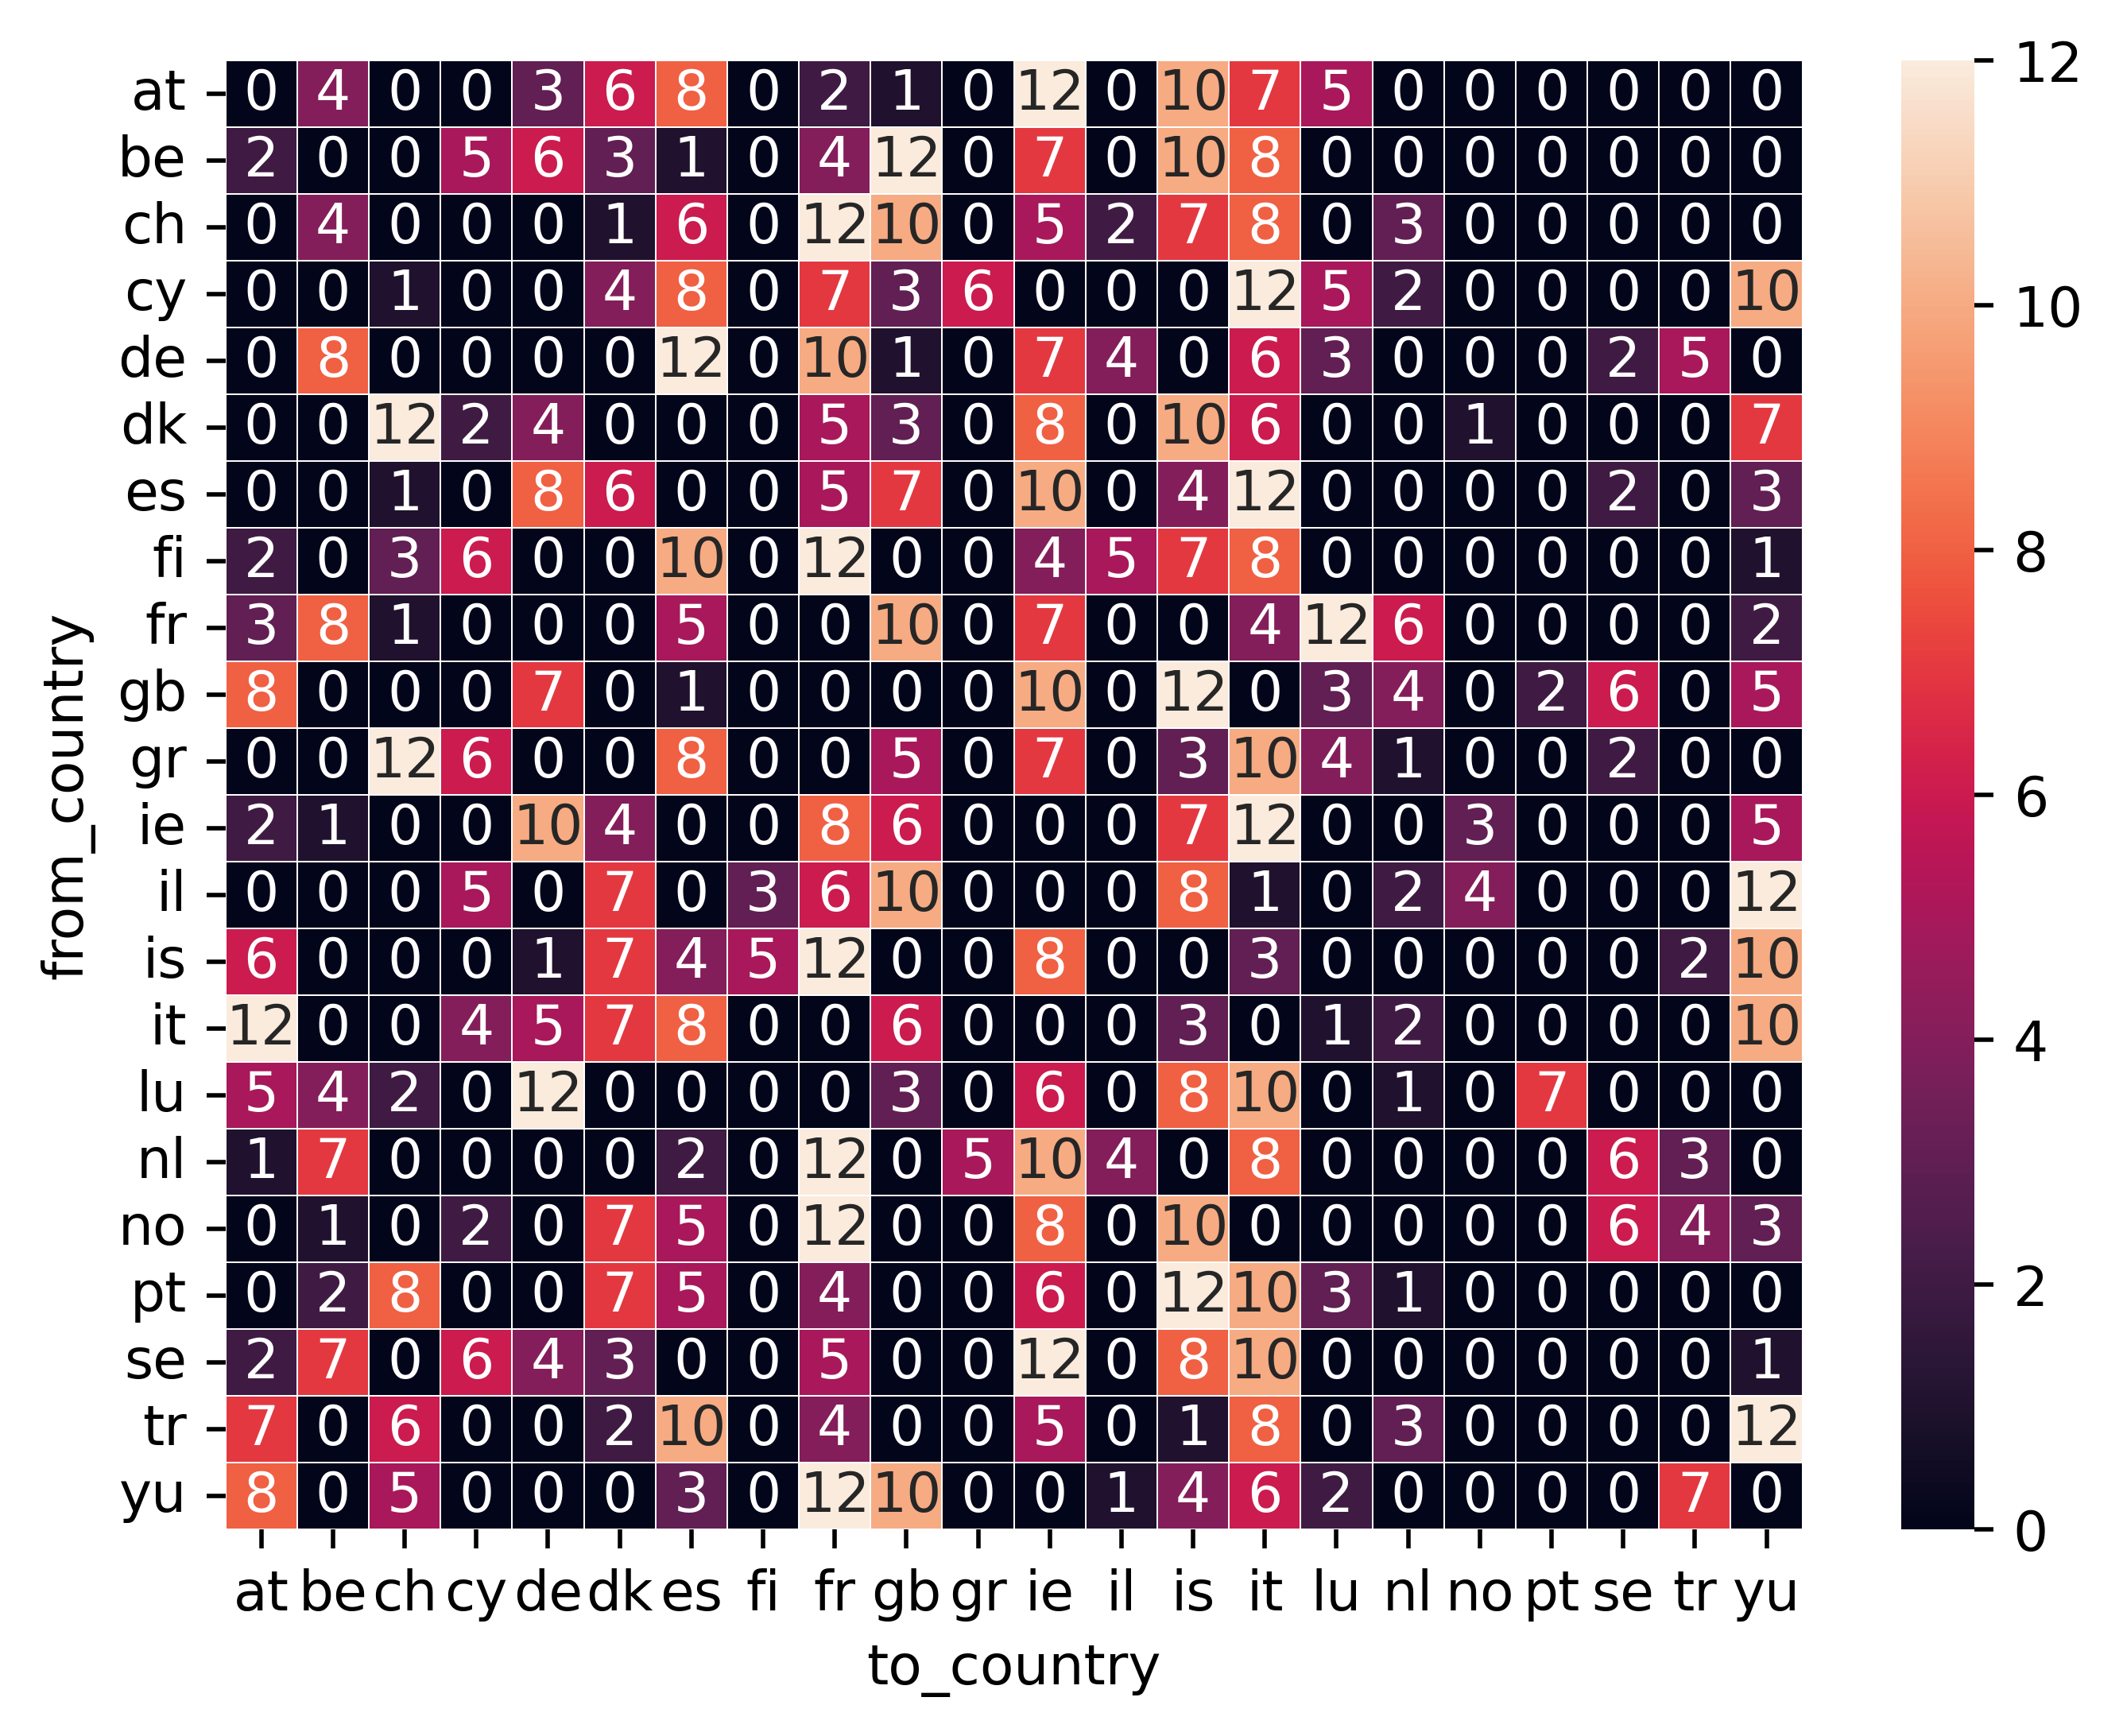

In [81]:
grid = vote_grid(1990)

with sns.plotting_context(font_scale=0.1):
    f, ax = plt.subplots(dpi=500)
    sns.heatmap(grid, annot=True, linewidths=0.25, ax=ax, xticklabels=True, yticklabels=True)

In [83]:
grid

to_country,at,be,ch,cy,de,dk,es,fi,fr,gb,...,il,is,it,lu,nl,no,pt,se,tr,yu
from_country,,,,,,,,,,,,,,,,,,,,,
at,0,4,0,0,3,6,8,0,2,1,...,0,10,7,5,0,0,0,0,0,0
be,2,0,0,5,6,3,1,0,4,12,...,0,10,8,0,0,0,0,0,0,0
ch,0,4,0,0,0,1,6,0,12,10,...,2,7,8,0,3,0,0,0,0,0
cy,0,0,1,0,0,4,8,0,7,3,...,0,0,12,5,2,0,0,0,0,10
de,0,8,0,0,0,0,12,0,10,1,...,4,0,6,3,0,0,0,2,5,0
dk,0,0,12,2,4,0,0,0,5,3,...,0,10,6,0,0,1,0,0,0,7
es,0,0,1,0,8,6,0,0,5,7,...,0,4,12,0,0,0,0,2,0,3
fi,2,0,3,6,0,0,10,0,12,0,...,5,7,8,0,0,0,0,0,0,1
fr,3,8,1,0,0,0,5,0,0,10,...,0,0,4,12,6,0,0,0,0,2
